**Part 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("StudentsPerformance (1).csv")

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# 1. Find the average score group wise for males and females separately.

In [ ]:
df.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


# 2. Find the % of males scoring above 80 in math and 85 in reading group wise under [parental level of education as bachelor degree

In [ ]:
a1 = df.groupby(['gender','parental level of education']).get_group(('male',"bachelor's degree"))
a2 = a1[(a1['math score']>80) & (a1['reading score']>85)]
a3 = df.groupby('gender').get_group('male')
(len(a2)/len(a3))*100

1.0373443983402488

# 3. Find the count of males under group E that are either having parental level of education as high school or under bachelor degree program

In [ ]:
a=df.groupby(['race/ethnicity','gender'])

b=a.get_group(('group E','male'))

c=b.groupby('parental level of education')

len(c.get_group('high school'))+len(c.get_group("bachelor's degree"))

18

# 4. Find the maximum marks for math, reading and writing for each group and plot them

In [ ]:
new = df.groupby('race/ethnicity')[['math score','reading score','writing score']].max()
new

,math score,reading score,writing score
race/ethnicity,,,
group A,100,100,97
group B,97,97,96
group C,98,100,100
group D,100,100,100
group E,100,100,100


<Figure size 2500x2500 with 0 Axes>

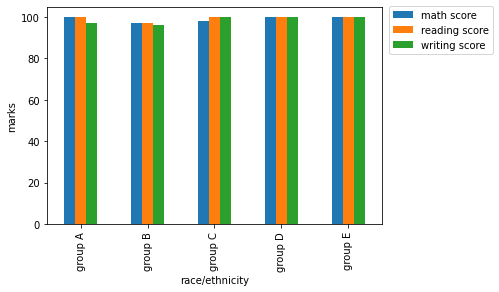

In [ ]:
plt.figure(figsize=(5,5),dpi=500)
new.plot(kind='bar')
plt.ylabel('marks')
plt.legend(loc=(1.02,0.78))

# 5. Plot the count of students based on their gender and whether they have prepared for the test or not

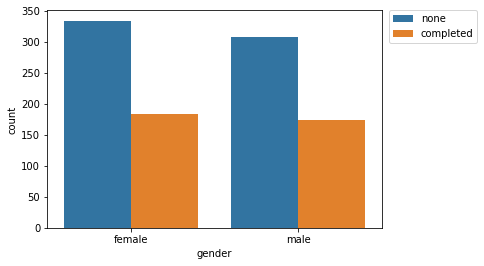

In [ ]:
sns.countplot(data=df,x='gender',hue='test preparation course')
plt.legend(loc=(1.02,0.85))

# 6. Plot the scores in all three subjects based on their gender

In [ ]:
temp=df.groupby('gender').mean()

temp

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


<Figure size 3000x2000 with 0 Axes>

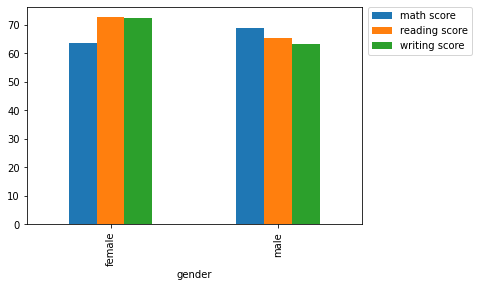

In [ ]:
plt.figure(dpi=500)
temp.plot(kind='bar')
plt.legend(loc=(1.02,0.78))

# 7. Plot the relations between various columns based on the correlation coefficient

In [ ]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


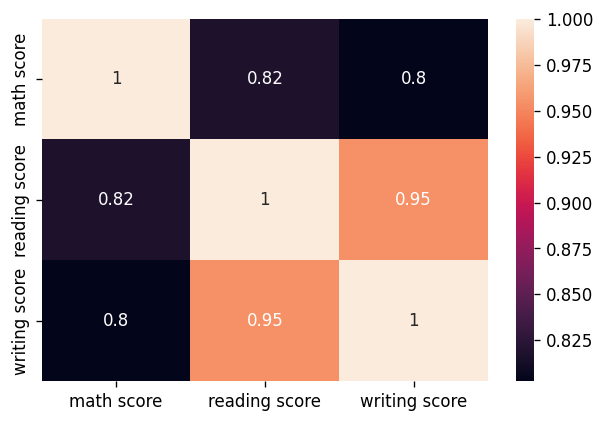

In [ ]:
plt.figure(dpi=120)
sns.heatmap(data=df.corr(),annot=True)

# 8. Plot the scores of each student group wise and parental level of education

In [ ]:
new = df.groupby(['race/ethnicity','parental level of education']).mean()
new=new.reset_index()
new.head()

,race/ethnicity,parental level of education,math score,reading score,writing score
0,group A,associate's degree,61.000000,67.071429,63.571429
1,group A,bachelor's degree,67.166667,68.083333,68.333333
2,group A,high school,60.444444,62.888889,60.500000
3,group A,master's degree,57.666667,64.666667,67.666667
4,group A,some college,63.888889,65.777778,65.000000


Text(0.5, 1.0, 'Race/Ethnicity vs Mean Math Score based on Parental level of education')

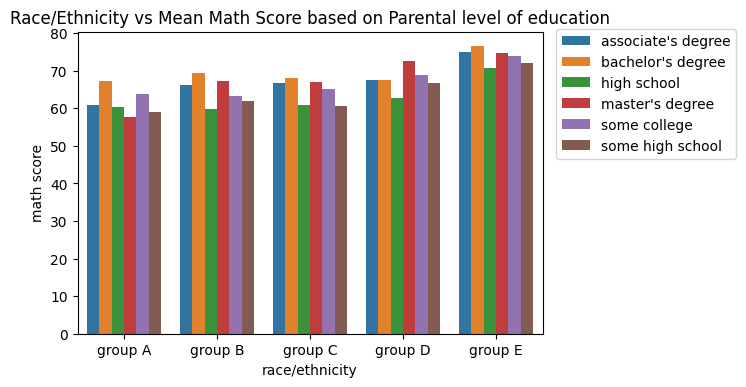

In [ ]:
plt.figure(dpi=100)
sns.barplot(data=new,x='race/ethnicity',y='math score',hue='parental level of education')
plt.legend(loc=(1.03,0.58))
plt.title('Race/Ethnicity vs Mean Math Score based on Parental level of education')

Text(0.5, 1.0, 'Race/Ethnicity vs Mean Writing Score based on Parental level of education')

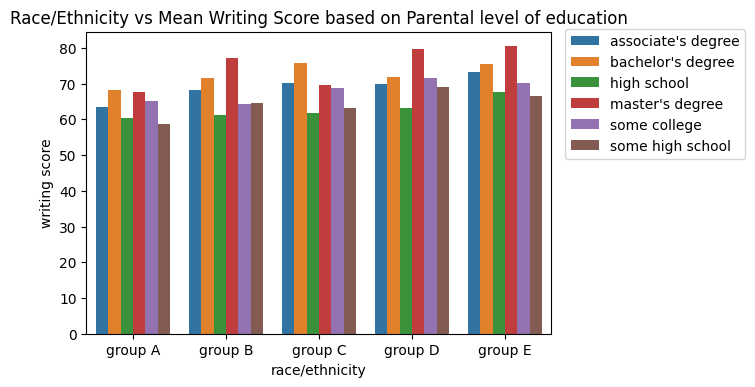

In [ ]:
plt.figure(dpi=100)
sns.barplot(data=new,x='race/ethnicity',y='writing score',hue='parental level of education')
plt.legend(loc=(1.03,0.58))
plt.title('Race/Ethnicity vs Mean Writing Score based on Parental level of education')

Text(0.5, 1.0, 'Race/Ethnicity vs Mean Reading Score based on Parental level of education')

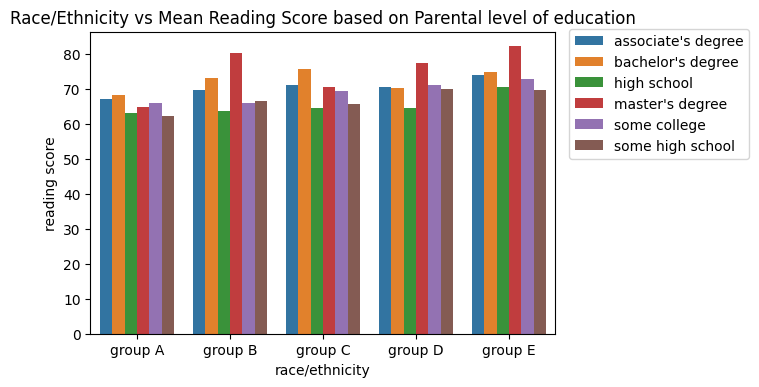

In [ ]:
plt.figure(dpi=100)
sns.barplot(data=new,x='race/ethnicity',y='reading score',hue='parental level of education')
plt.legend(loc=(1.03,0.58))
plt.title('Race/Ethnicity vs Mean Reading Score based on Parental level of education')

# 9. Plot the relation between marks and preparation that will help understand them properly

In [ ]:
new=df.groupby('test preparation course').mean()
new

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


<Figure size 600x400 with 0 Axes>

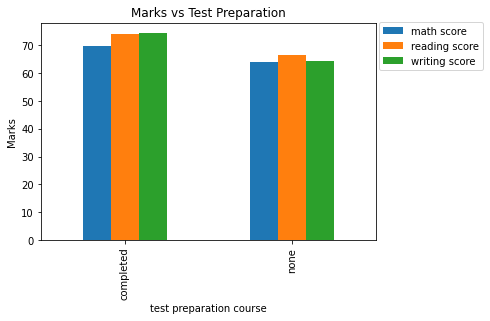

In [ ]:
plt.figure(dpi=100)
new.plot(kind='bar')
plt.ylabel('Marks')
plt.title('Marks vs Test Preparation')
plt.legend(loc=(1.01,0.78))
plt.show()

# 10. Using any kind of plot, find whether the data is left skewed or right skewed based on scores of each subject.

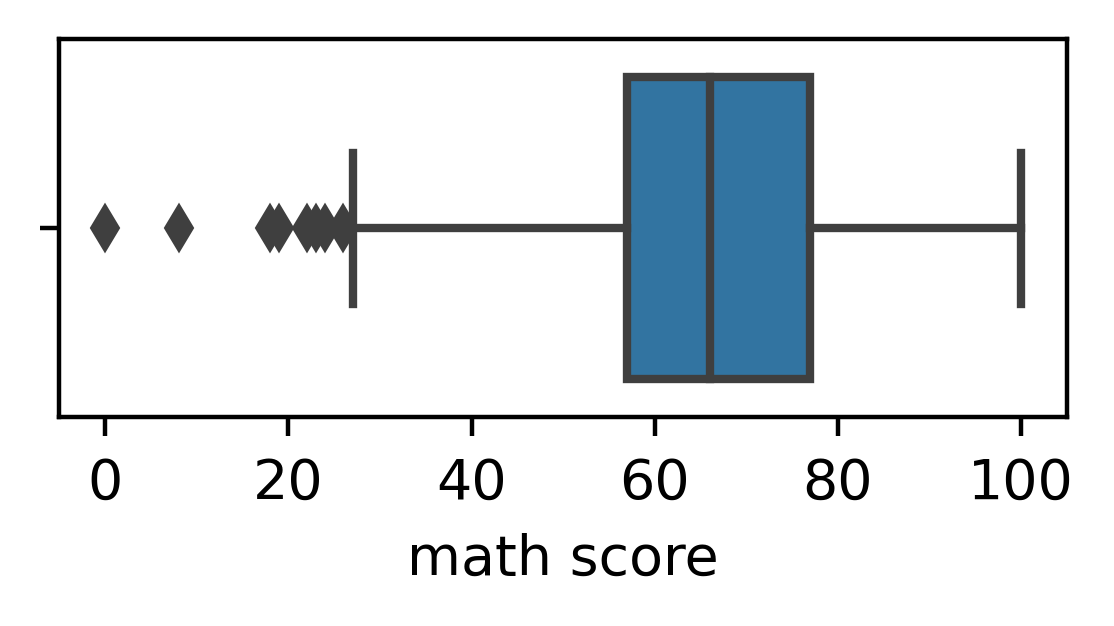

In [ ]:
plt.figure(figsize=(3.25,1.25),dpi=400)
sns.boxplot(data=df,x='math score')

**Based on the math score, the data is right-skewed.**

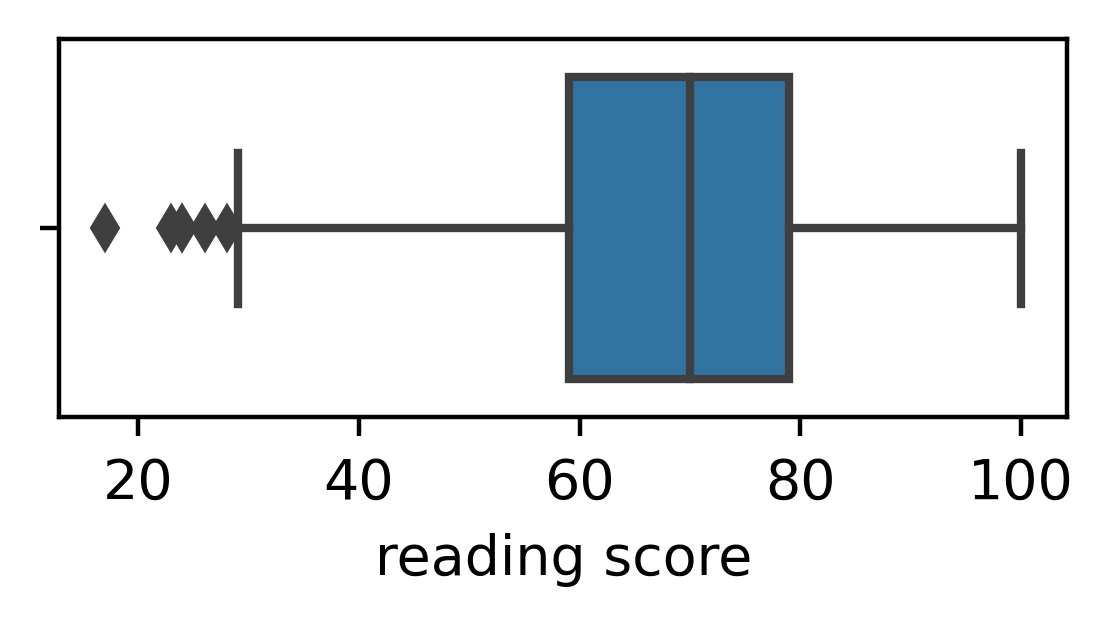

In [ ]:
plt.figure(figsize=(3.25,1.25),dpi=400)
sns.boxplot(data=df,x='reading score')

**Based on the math score, the data is left-skewed.**

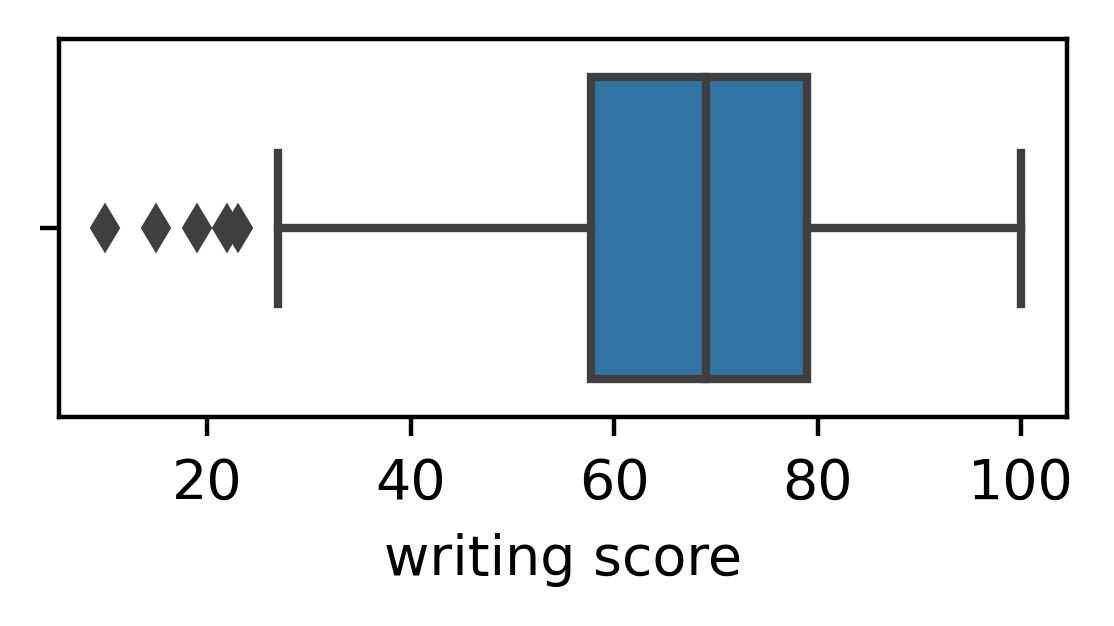

In [ ]:
plt.figure(figsize=(3.25,1.25),dpi=400)
sns.boxplot(data=df,x='writing score')

**Based on the math score, the data is left-skewed.**



# Perform one hot encoding to prepare the dataset for ML models

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(dtype=np.int32)

In [ ]:
asd = ohe.fit_transform(df[['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']]).toarray()

In [ ]:
asd

array([[1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 1]])

In [ ]:
ohe.categories_

[array(['female', 'male'], dtype=object),
 array(['group A', 'group B', 'group C', 'group D', 'group E'],
       dtype=object),
 array(["associate's degree", "bachelor's degree", 'high school',
        "master's degree", 'some college', 'some high school'],
       dtype=object),
 array(['free/reduced', 'standard'], dtype=object),
 array(['completed', 'none'], dtype=object)]

In [ ]:
col_labels = np.array(['female', 'male','group A', 'group B', 'group C', 'group D', 'group E',"associate's degree", "bachelor's degree", 'high school',"master's degree", 'some college', 'some high school','free/reduced', 'standard','completed', 'none','math score', 'reading score','writing score'],dtype=object)

In [ ]:
df[['math score', 'reading score','writing score']].values

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

In [ ]:
final_df = pd.DataFrame(np.hstack((asd,df[['math score', 'reading score','writing score']].values)),columns=col_labels)

In [ ]:
final_df.head()

,female,male,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none,math score,reading score,writing score
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,72,72,74
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,69,90,88
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,90,95,93
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,47,57,44
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,76,78,75


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**DATA PREP**

In [ ]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [ ]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [ ]:
final_df = pd.concat([df_objs,df_nums],axis=1)

In [ ]:
final_df.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,math score,reading score,writing score
0,0,1,0,0,0,1,0,0,0,0,1,1,72,72,74
1,0,0,1,0,0,0,0,0,1,0,1,0,69,90,88
2,0,1,0,0,0,0,0,1,0,0,1,1,90,95,93
3,1,0,0,0,0,0,0,0,0,0,0,1,47,57,44
4,1,0,1,0,0,0,0,0,1,0,1,1,76,78,75


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
final_df.to_csv('task_df.csv')